# Heart disease dataset EDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [15]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [ ]:
# first five rows of the data
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [ ]:
# first five rows of the target
y.head()

,num
0,0
1,2
2,1
3,0
4,0


In [ ]:
# frequency of each class in the target
unique, counts = np.unique(y, return_counts=True)
freq_dict = dict(zip(unique, counts))
print(freq_dict)

{np.int64(0): np.int64(164), np.int64(1): np.int64(55), np.int64(2): np.int64(36), np.int64(3): np.int64(35), np.int64(4): np.int64(13)}


In [ ]:
# convert to binary classification
y = (y>0).astype(int)
y.head()

,num
0,0
1,1
2,1
3,0
4,0


# Variable Selection

In [ ]:
# Correlation between 'chol' and target
corr = X['chol'].corr(y['num'])
print(f"Correlation between 'chol' and target: {corr}")

Correlation between 'chol' and target: 0.08516361139953128


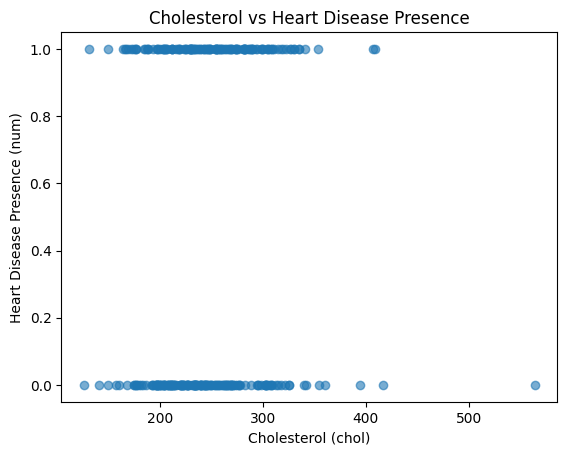

In [22]:
plt.scatter(X['chol'], y['num'], alpha=0.6)
plt.xlabel('Cholesterol (chol)')
plt.ylabel('Heart Disease Presence (num)')
plt.title('Cholesterol vs Heart Disease Presence')
plt.show()

In [ ]:
# Correlation between 'thalach' and target
corr = X['thalach'].corr(y['num'])
print(f"Correlation between 'thalach' and target: {corr}")

Correlation between 'thalach' and target: -0.4171668769579608


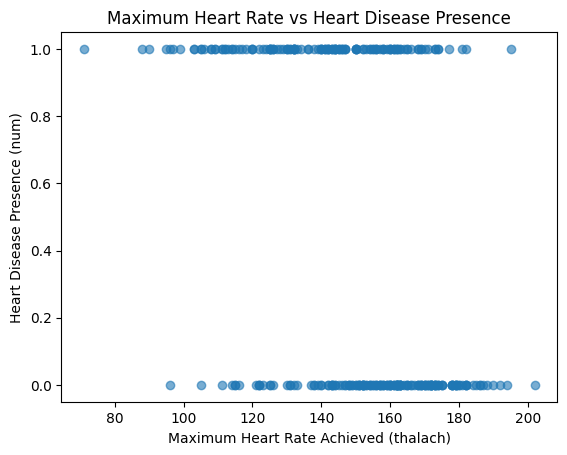

In [24]:
plt.scatter(X['thalach'], y['num'], alpha=0.6)
plt.xlabel('Maximum Heart Rate Achieved (thalach)')
plt.ylabel('Heart Disease Presence (num)')
plt.title('Maximum Heart Rate vs Heart Disease Presence')
plt.show()

# Process the dataset and save in the data folder

In [ ]:
# Create /data directory if it doesn't exist
os.makedirs('data', exist_ok=True)

# Select only 'thalach' and 'num' columns
processed = X[['thalach']].copy()
processed['num'] = y['num']

# Save to CSV
processed.to_csv('data/processed.csv', index=False)